<a href="https://colab.research.google.com/github/ltoosaint24/DS-Unit-2-Applied-Modeling/blob/master/Loveline_toussaint_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [3]:
%%capture

import sys

if 'google.colab' in sys.modules:
  DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
  !pip install category_encoders==2.*

else:
  DATA_PATH = '../data/'


In [4]:
import pandas as pd
pd.options.display.max_columns = None

df = pd.read_csv('/content/global-demand-for-education-world-population-and-projected-growth-to-2100-by-age-group.csv')

In [5]:
df.head()

,Entity,Code,Year,"Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Population under age 5","Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Population under age 15","Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total","Medium fertility variant, 2020 - 2100: Total population by broad age group, both sexes combined (thousands) - Population under age 5","Medium fertility variant, 2020 - 2100: Total population by broad age group, both sexes combined (thousands) - Population under age 15","Medium fertility variant, 2020 - 2100: Total population by broad age group, both sexes combined (thousands) - Total"
0,Afghanistan,AFG,1950,1291.622,3179.867,7752.117,NaN,NaN,NaN
1,Afghanistan,AFG,1951,1314.492,3235.425,7840.151,NaN,NaN,NaN
2,Afghanistan,AFG,1952,1320.099,3281.624,7935.996,NaN,NaN,NaN
3,Afghanistan,AFG,1953,1323.502,3327.335,8039.684,NaN,NaN,NaN
4,Afghanistan,AFG,1954,1333.989,3376.382,8151.316,NaN,NaN,NaN


In [6]:
df['Year'].value_counts()

2047    246
2058    246
1994    246
1962    246
2091    246
       ... 
2035    246
2003    246
1971    246
2098    246
2049    246
Name: Year, Length: 151, dtype: int64

In [7]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Population under age 5',
       'Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Population under age 15',
       'Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total',
       'Medium fertility variant, 2020 - 2100: Total population by broad age group, both sexes combined (thousands) - Population under age 5',
       'Medium fertility variant, 2020 - 2100: Total population by broad age group, both sexes combined (thousands) - Population under age 15',
       'Medium fertility variant, 2020 - 2100: Total population by broad age group, both sexes combined (thousands) - Total'],
      dtype='object')

In [8]:
df['Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total'].describe()

count    1.746600e+04
mean     1.816455e+05
std      6.562412e+05
min      1.376300e+01
25%      1.540062e+03
50%      7.158464e+03
75%      3.890044e+04
max      7.794799e+06
Name: Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


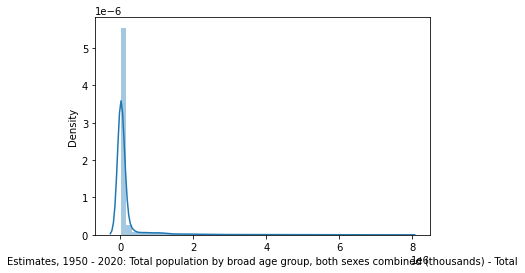

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total']);

In [10]:
df = df.dropna(subset =['Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total'])
df['Estimates'] = df['Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total'] >= 8000

In [11]:
y = df['Estimates']
y.nunique()
#There is a binary classification, because of the numeric catalog of two provided in the 

2

In [12]:
y.value_counts(normalize = True)

False    0.520382
True     0.479618
Name: Estimates, dtype: float64

In [13]:
#Number of Estimates made within those year periods.
df['Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total'].nunique()

17453

In [14]:
#the Estimate values
df['Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total'].unique()

array([ 7752.117,  7840.151,  7935.996, ..., 14438.812, 14645.473,
       14862.927])

In [15]:
df['Entity'].nunique()

246

In [16]:
yy = df['Entity']
yy.nunique()

246

In [17]:
df['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia, Central', 'Australia', 'Australia & New Zealand', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Caribbean', 'Central African Republic',
       'Central America', 'Central and Southern Asia', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Eastern Africa', 'Eastern Asia',
       'Eastern Europe', 'Eastern and South-Eastern Asia', 'Ecuador',
       '

In [18]:
df['Entity'] = df['Entity'].str.lower()
df['Entity'].nunique()

246

In [19]:
upperMedian = df['Entity'].str.contains('Upper-middle-income countries')
LowerMedian = df['Entity'].str.contains('Lower-middle-income-countries')
NoIncome = df['Entity'].str.contains('No income group available')
LessDevelop = df['Entity'].str.contains('Less Develop Region')
leastDevelop = df['Entity'].str.contains('Least Develop Countries' )


In [20]:
upperMedial = df['Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total'] >= 8000
lowerMedial = df['Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total'] <= 5000
Medial = df['Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total'] == 5000

In [21]:
df.loc[upperMedial, 'EntityII'] = 'Upper Median'
df.loc[lowerMedial,'EntityII'] = 'Lower Median'
df.loc[Medial, 'EntityII'] = 'Median'

#This is recateorize of Entity based on Estimate values 
df['EntityII'].value_counts()

Upper Median    8377
Lower Median    7631
Name: EntityII, dtype: int64

In [22]:
df = df.drop(columns = ['Medium fertility variant, 2020 - 2100: Total population by broad age group, both sexes combined (thousands) - Population under age 5',
       'Medium fertility variant, 2020 - 2100: Total population by broad age group, both sexes combined (thousands) - Population under age 15',
       'Medium fertility variant, 2020 - 2100: Total population by broad age group, both sexes combined (thousands) - Total'])

In [23]:
df.isna().sum().sort_values()

Entity                                                                                                                       0
Year                                                                                                                         0
Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Population under age 5        0
Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Population under age 15       0
Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total                         0
Estimates                                                                                                                    0
EntityII                                                                                                                  1458
Code                                                                                                           

In [24]:
df['Code'].dtypes

dtype('O')

In [25]:
#Filling in the missing value for the Code
# The function should subscript the Entity logs into 3 character code
def codeFill(entiti):
 for x in range(len(entiti)):
   for y in entiti:
    ent = y
    coder = ent[:3]
 return coder

In [26]:
df = df.fillna('MIS') #This filler is used to inicate a Missing Code

In [27]:
df.isna().sum().sort_values()

Entity                                                                                                                    0
Code                                                                                                                      0
Year                                                                                                                      0
Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Population under age 5     0
Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Population under age 15    0
Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total                      0
Estimates                                                                                                                 0
EntityII                                                                                                                  0
dtype: i

In [28]:
import datetime
import numpy as numy
df['Year'].dtype


dtype('int64')

In [29]:
df[df['Year'] == 'Other']

,Entity,Code,Year,"Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Population under age 5","Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Population under age 15","Estimates, 1950 - 2020: Total population by broad age group, both sexes combined (thousands) - Total",Estimates,EntityII


In [30]:
df['Year'] = pd.to_datetime(df['Year']) #The year was shifted  into dateetime object

In [31]:
train = df[df['Year'].dt.year <=1970]
val = df[df['Year'].dt.year == 1970]
test = df[df['Year'].dt.year >=1950]

In [32]:
train.shape, val.shape, test.shape

((17466, 8), (17466, 8), (17466, 8))

In [33]:
import category_encoders as cre 
from sklearn.pipeline import make_pipeline 
from sklearn.tree import DecisionTreeClassifier

target = 'Entity'
features = train.columns.drop([target,'Year'])

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    cre.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth = 3)   
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))
#The values were split and organized according to Entity and Estimate prices, there was an
# accuracy value of 2.03%

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Validation Accuracy 0.02032520325203252


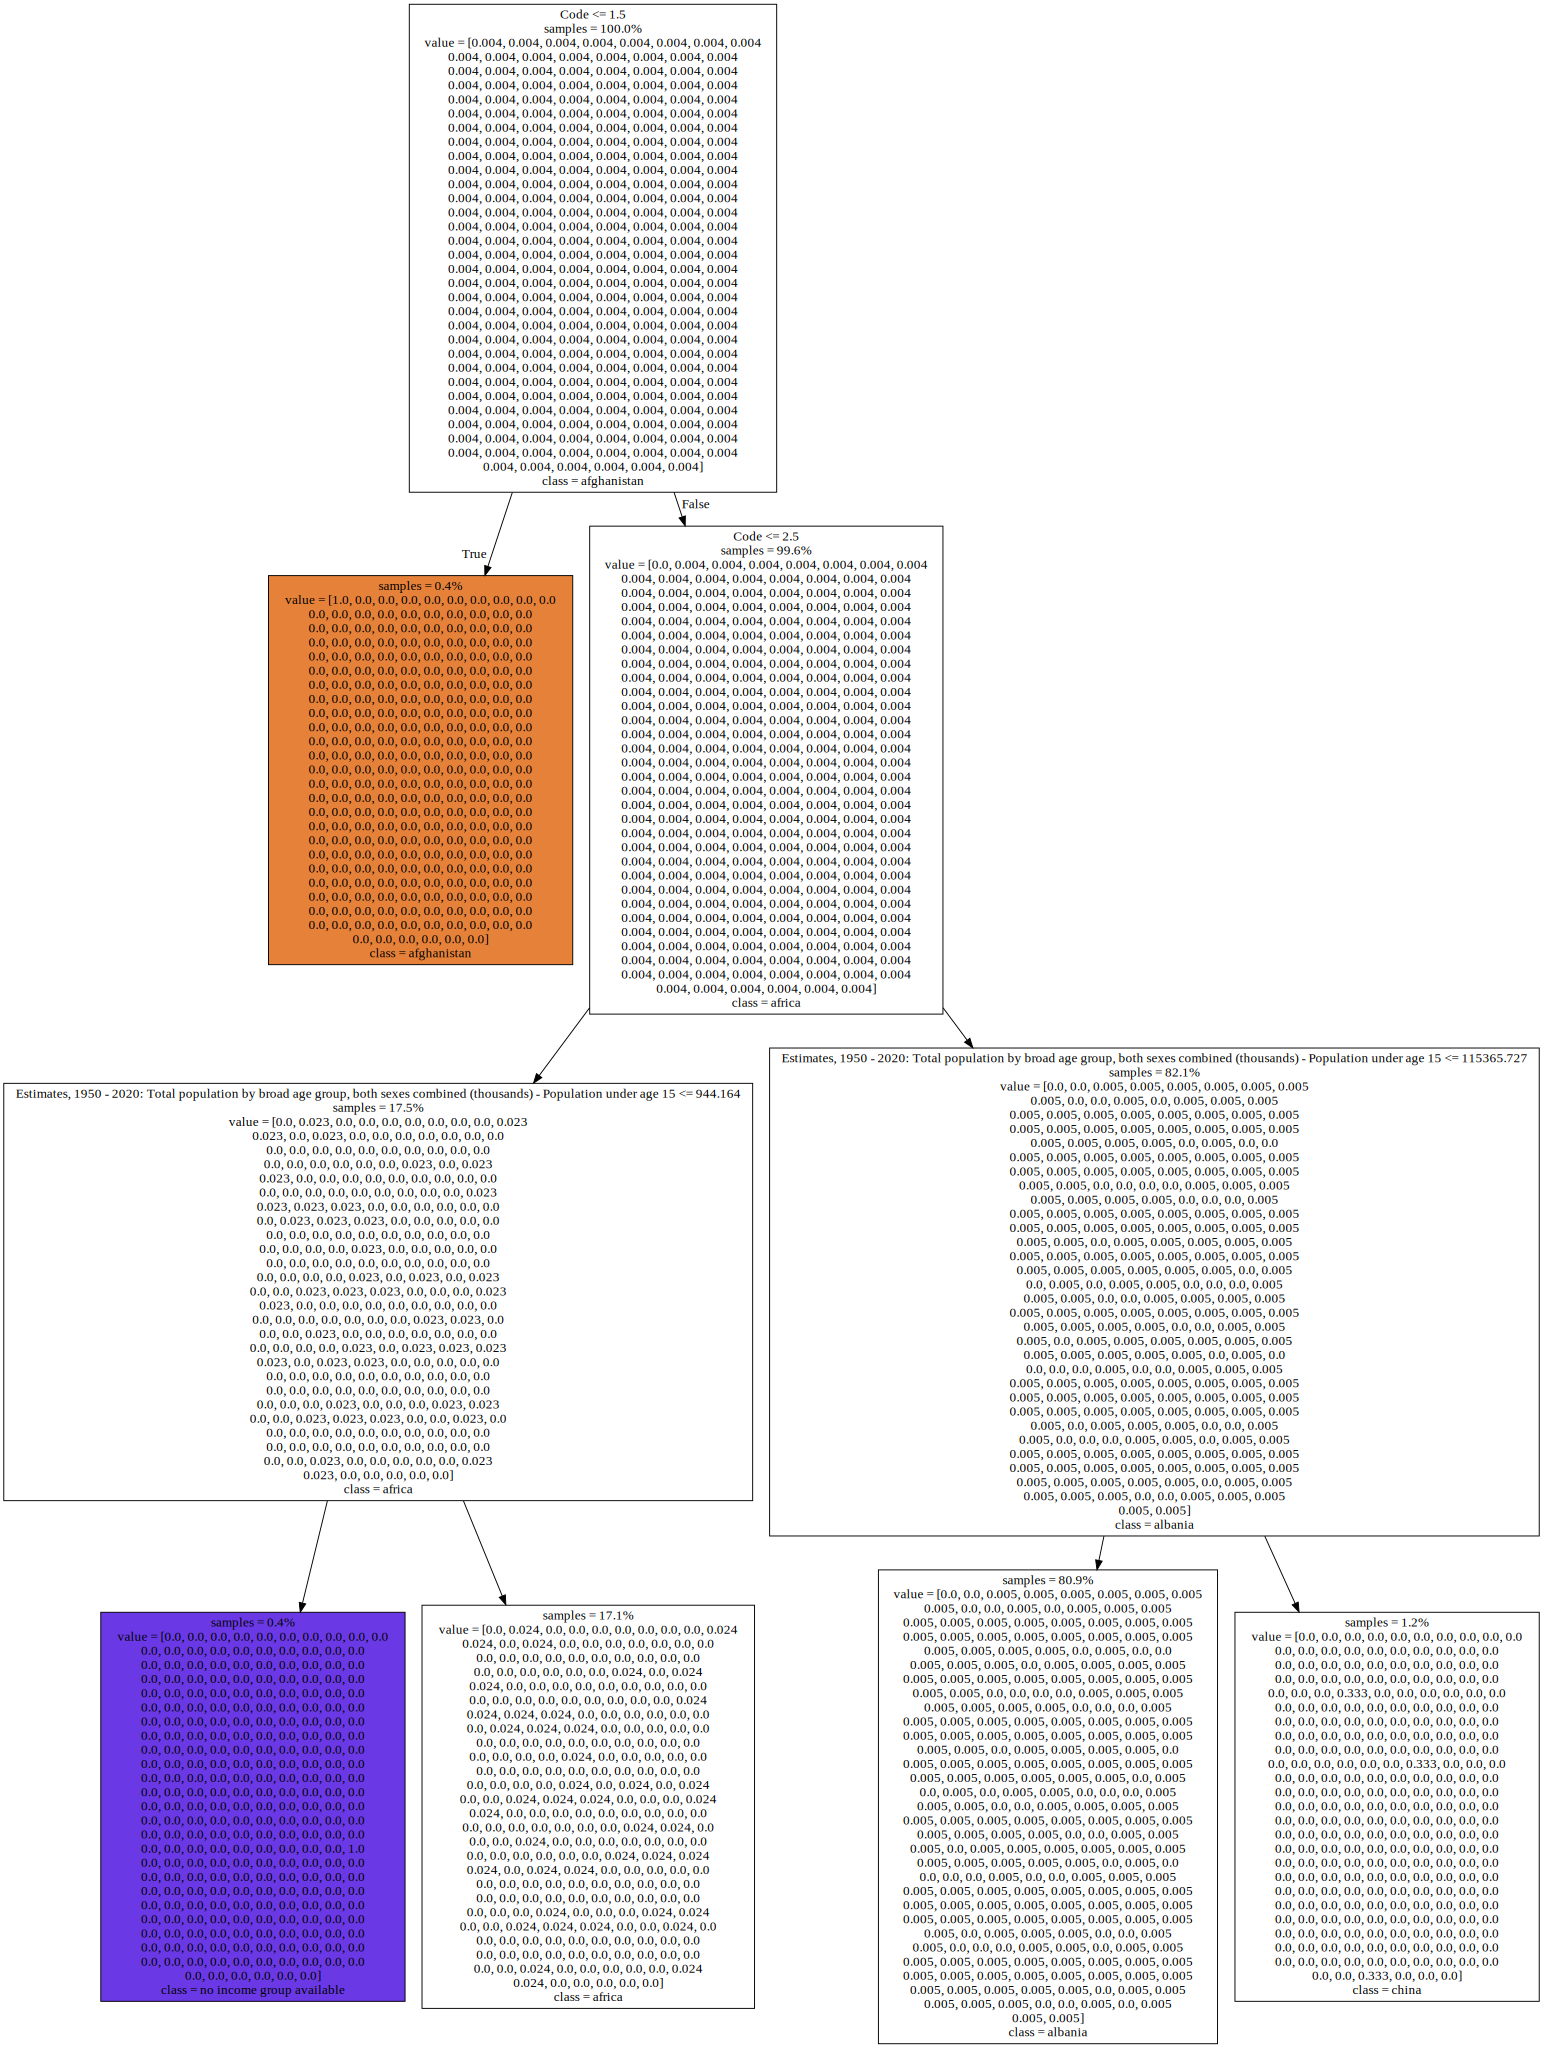

In [34]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']


dot_data = export_graphviz(
    tree,
    out_file = None,
    feature_names = X_train.columns,
    class_names = y_train.unique().astype(str),
    filled = True,
    impurity = False,
    proportion = True
)

graphviz.Source(dot_data)

In [35]:
y.value_counts(normalize = True)

False    0.520382
True     0.479618
Name: Estimates, dtype: float64

In [36]:
features = train.columns.drop([target, 'Year','Entity'])
X_train = train[features]
X_val = val[features]

pipeline = make_pipeline(
    cre.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth = 3)

)
pipeline.fit(X_train,y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.02032520325203252


In [38]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:,-1]

roc_auc_score(y_val, y_pred_proba)
#This is an example of regrssion example because we are observing Extimate values, or continous values

ValueError: ignored

In [39]:
y = df['Estimates']
# a regression Plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


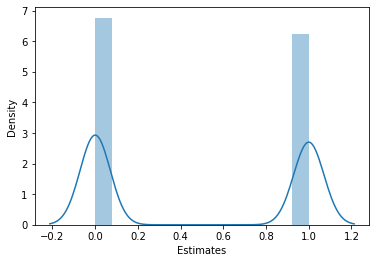

In [40]:
import seaborn as sns
sns.distplot(y)

In [41]:
y.describe()

count     17466
unique        2
top       False
freq       9089
Name: Estimates, dtype: object

In [42]:
import numpy as numy

df = df[(df['Estimates'] >= numy.percentile(df['Estimates'], 0.5)) &
        (df['Estimates'] <= numy.percentile(df['Estimates'], 99.5))]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


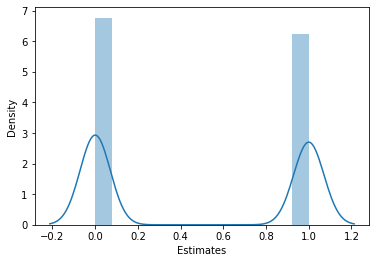

In [43]:
y = df['Estimates']
sns.distplot(y)

In [44]:
y.describe()

count     17466
unique        2
top       False
freq       9089
Name: Estimates, dtype: object